In [1]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
cd /content/drive/"MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

'Copy of deg_linear_.ipynb'   linear.csv
 data0505_charging.csv        linear_sine.csv
 data0505.csv                 NYcityTaxi-Power.xlsx
 data0505.xlsx                Untitled
'deg_linear (1).ipynb'        Untitled0.ipynb
 deg_linear_.ipynb            Untitled1.ipynb
 deg_linear.ipynb            'Visualization of Battery Data (1).ipynb'
'deg_nn (1).ipynb'           'Visualization of Battery Data.ipynb'
 deg_nn.ipynb


In [5]:
df = pd.read_excel("data0505.xlsx",header=0)
# clean up data
df = df.dropna(how = 'all')
df = df.fillna(0)
df = df.round(4)
df=df[df['Power']>=0]
df=df[df['SOC']>0]
df=df[df['SOH']>0]
df=df[df['SEI_delta']>0]
df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
10,80,1.0,0.0526,23,0.0,44.8776
11,80,1.0,0.1579,23,0.0,46.1896
12,80,1.0,0.2632,23,0.0,47.5605
13,80,1.0,0.3684,23,0.0,48.9998
14,80,1.0,0.4737,23,0.0,50.4819


In [6]:
min_sei = min(df.iloc[:,5])
max_sei = max(df.iloc[:,5])
min_sei
max_sei
range_sei = max_sei-min_sei

# normalizaed
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

,0,1,2,3,4,5
0,1.0,0.0,0.000000,0.0,0.0,0.067068
1,1.0,0.0,0.111146,0.0,0.0,0.153487
2,1.0,0.0,0.222293,0.0,0.0,0.243787
3,1.0,0.0,0.333333,0.0,0.0,0.338592
4,1.0,0.0,0.444480,0.0,0.0,0.436216


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:

x = np.array(df_normalized.iloc[:,0:3])#SoC, SoH, power
y = np.array(df_normalized.iloc[:,5])#SEI_delta
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
total_len = X_train.shape[0]
total_len

4872

In [9]:
regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression()

In [10]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.022439   -0.04618564  0.68645928]


In [11]:
y_pred=regr.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("R^2 : ", r2_score(Y_test, y_pred))
print("Mean Absolute error :", mean_absolute_error(Y_test,y_pred))
print("Root mean square error:",np.sqrt(mean_squared_error(Y_test, y_pred)))

R^2 :  0.9897341599957602
Mean Absolute error : 0.015277389823292381
Root mean square error: 0.02237125934489348


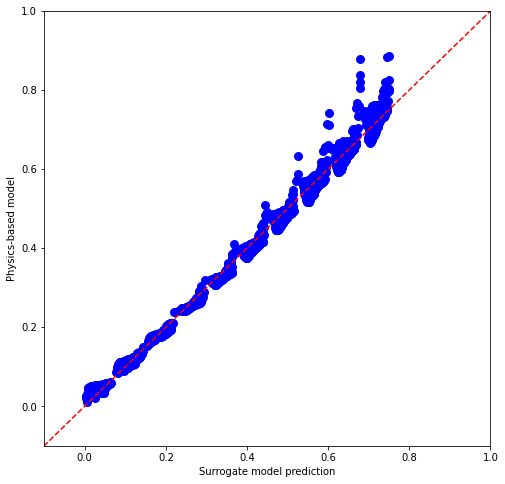

In [13]:

plt.figure(figsize=(8,8))
# Plot outputs
plt.scatter(regr.predict(X_test), Y_test, color='blue',
         linewidth=3)
plt.plot(range(-1,2),range(-1,2),'r--')
plt.ylim([-0.1,1])
plt.xlim([-0.1,1])
plt.xlabel('Surrogate model prediction')
plt.ylabel('Physics-based model')
plt.show()
